In [22]:
import pyaudio
po = pyaudio.PyAudio()

deviceList = []
print("DEVICE\t\tINDEX\t\trate")

for index in range(po.get_device_count()): 
    #if desc["name"] == "record":
    print("%s %s %s" %  (desc["name"], index,  int(desc["defaultSampleRate"])))
    desc = po.get_device_info_by_index(index)
    deviceList.append((desc["name"], index,  int(desc["defaultSampleRate"])))
    
#https://developer.gnome.org/gnome-devel-demos/stable/guitar-tuner.py.html.ko
#https://m.blog.naver.com/muztek/221765145561

DEVICE		INDEX		rate
스피커 (Logitech USB Headset) 0 44100
Microsoft Sound Mapper - Input 1 44100
마이크(2- Logitech USB Headset) 2 44100
마이크(2- USB PnP Sound Device) 3 44100
마이크(Realtek(R) Audio) 4 44100
Microsoft Sound Mapper - Output 5 44100
스피커(2- Logitech USB Headset) 6 44100
스피커(2- USB PnP Sound Device) 7 44100
스피커(Realtek(R) Audio) 8 44100
주 사운드 캡처 드라이버 9 44100
마이크(2- Logitech USB Headset) 10 44100
마이크(2- USB PnP Sound Device) 11 44100
마이크(Realtek(R) Audio) 12 44100
주 사운드 드라이버 13 44100
스피커(2- Logitech USB Headset) 14 44100
스피커(2- USB PnP Sound Device) 15 44100
스피커(Realtek(R) Audio) 16 44100
스피커(2- USB PnP Sound Device) 17 48000
스피커(Realtek(R) Audio) 18 48000
스피커(2- Logitech USB Headset) 19 48000
마이크(2- USB PnP Sound Device) 20 48000
마이크(2- Logitech USB Headset) 21 48000
마이크(Realtek(R) Audio) 22 48000
Speakers (Realtek HD Audio output) 23 44100
마이크 배열 (Realtek HD Audio Mic input) 24 44100
스테레오 믹스 (Realtek HD Audio Stereo input) 25 48000
Output (NVIDIA High Definition Audio) 26 44100
Out

recording...
finished recording


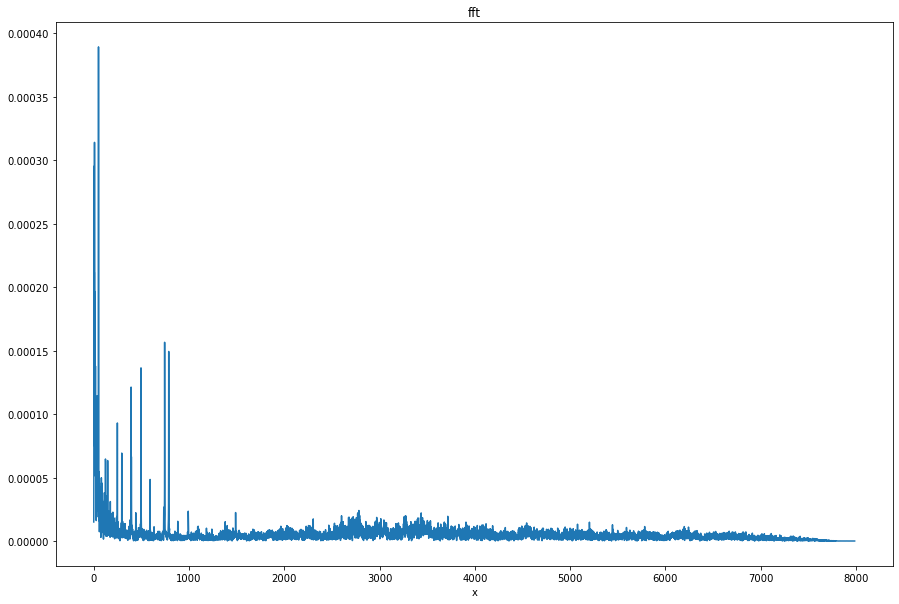

In [24]:
import pyaudio
import wave
import librosa.display
import matplotlib.pyplot as plt
import audioop
import numpy as np
 
FORMAT = pyaudio.paInt16

CHANNELS = 1

RATE = 44100

CHUNK = 1024

RECORD_SECONDS = 1

FIG_SIZE = (15,10)

WAVE_OUTPUT_FILENAME = "file.wav"

audio = pyaudio.PyAudio()

# start Recording

#input_device_index= 마이크 지정해주고 싶으면 위에꺼 보고 index에서 가져 오면됨 아니면 그냥 두면 시스템 마이크 먹는듯

stream = audio.open(format=pyaudio.paInt16, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

print ("recording...")


frames = []
num=0
while (num<1):
    for x in range(1):
        for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):

            data = stream.read(CHUNK)
            frames.append(data)
        
        
        waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
        waveFile.setnchannels(CHANNELS)
        waveFile.setsampwidth(audio.get_sample_size(FORMAT))
        waveFile.setframerate(RATE)
        waveFile.writeframes(b''.join(frames))
        waveFile.close()

        file = "file.wav"
        
        sig, sr = librosa.load(file, sr=16000)
    
        
        fft_change = np.fft.fft(sig) / len(sig)
        F_abs = np.abs(fft_change)
        F_abs_h = F_abs[0:int(len(F_abs)/2)]
        
        
        #mfcc = librosa.feature.mfcc(sig)
        #rms = audioop.rms(sig, 2)
        #print(np.mean(mfcc))
               
        plt.figure(figsize=FIG_SIZE)
        plt.plot(F_abs_h)
        #librosa.display.waveplot(fft_change, sr, alpha=0.5)
        plt.xlabel("x")
        #plt.ylabel("y")
        plt.title("fft")
    num += 1
print ("finished recording")

# stop Recording

stream.stop_stream()

stream.close()

audio.terminate()

 

#waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')

#waveFile.setnchannels(CHANNELS)

#waveFile.setsampwidth(audio.get_sample_size(FORMAT))

#waveFile.setframerate(RATE)

#waveFile.writeframes(b''.join(frames))

#waveFile.close()